### Challenge Set 5 - Linear Splitting

__Topic:__        Challenge Set 5  
__Subject:__      Linear Splitting     
__Date:__         01/28/18    
__Name:__         Jonathan Kislin    
__Worked with:__  Christine L.  :)

Linear Regression and Train/Test Split challenges
Ideally, try these with your own data! (Alternatively, there is the 2013_movies.csv data set.

#### Setup

In [28]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
%matplotlib inline

In [29]:
def ends(df, n_rows=5):
    raw = pd.DataFrame(['...']*df.shape[1],index = df.columns).T
    ends_df = df.head(n_rows).append(raw).append(df.tail(n_rows)) 
    return ends_df

In [30]:
data = pd.read_csv('forestfires.csv')

Attribute Information:

For more information, read [Cortez and Morais, 2007].   
1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9   
2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9  
3. month - month of the year: 'jan' to 'dec'   
4. day - day of the week: 'mon' to 'sun'   
5. FFMC - FFMC index from the FWI system: 18.7 to 96.20   
6. DMC - DMC index from the FWI system: 1.1 to 291.3   
7. DC - DC index from the FWI system: 7.9 to 860.6   
8. ISI - ISI index from the FWI system: 0.0 to 56.10   
9. temp - temperature in Celsius degrees: 2.2 to 33.30   
10. RH - relative humidity in %: 15.0 to 100   
11. wind - wind speed in km/h: 0.40 to 9.40   
12. rain - outside rain in mm/m2 : 0.0 to 6.4   
13. area - the burned area of the forest (in ha): 0.00 to 1090.84   
(this output variable is very skewed towards 0.0, thus it may make   
sense to model with the logarithm transform).

In [31]:
ends(data)

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
3,8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
0,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0,11.16
515,1,4,aug,sat,94.4,146,614.7,11.3,25.6,42,4,0,0


#### Challenge 1 
Build a linear model that uses only a constant term (a column of ones) to predict a continuous outcome (like domestic total gross). How can you interpret the results of this model? What does it predict? Make a plot of predictions against actual outcome. Make a histogram of residuals. How are the residuals distributed?

In [32]:
fts = np.ones((517,1)) # 517 obersvations, one dimensional array
target = data.RH # relative humidity

In [33]:
# I'd like to see more info
model = sm.OLS(target, fts).fit()
model.summary()

# I guess this is what happens when there's zero variance in your predictor!

/anaconda3/lib/python3.6/site-packages/statsmodels/regression/linear_model.py:1396: RuntimeWarning: divide by zero encountered in double_scalars
  return self.ess/self.df_model


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RH   R-squared:                      -0.000
Model:                            OLS   Adj. R-squared:                 -0.000
Method:                 Least Squares   F-statistic:                      -inf
Date:                Tue, 30 Jan 2018   Prob (F-statistic):                nan
Time:                        16:12:26   Log-Likelihood:                -2176.7
No. Observations:                 517   AIC:                             4355.
Df Residuals:                     516   BIC:                             4360.
Df Model:                           0                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         44.2882      0.718     61.714      0.000      42.878      45.698
==============================================================================
Omnibus:                       53.657   Durbin-Watson:                   1.672
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               67.631
Skew:                           0.860   Prob(JB):                     2.06e-15
Kurtosis:                       3.422   Cond. No.                         1.00
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*I've never tried this before! Very interesting. I suspect that any one-predictor model with 0 variance produces a 0 r-squared. We can interpret this result - 44.2882 - to be the expected mean value of y. Let's see if that's true!*

In [34]:
np.mean(target)
# wow! I was kind of expecting this to not work, but look at that!
# So, all this model is doing is telling us the mean... 517 times -_-

44.28820116054158

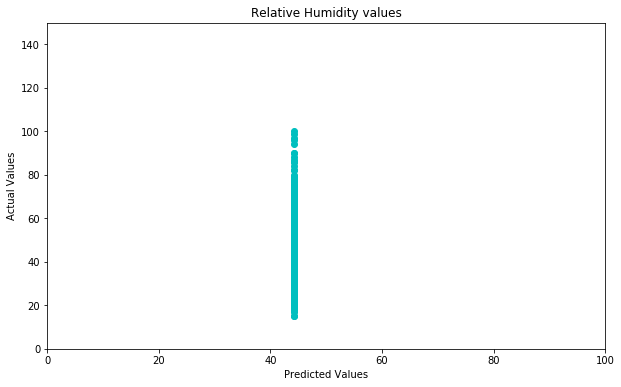

In [14]:
plt.figure(figsize=(10,6))
plt.plot(model.predict(),target, 'co')
plt.xlim(0,100)
plt.ylim(0,150)
plt.title('Relative Humidity values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

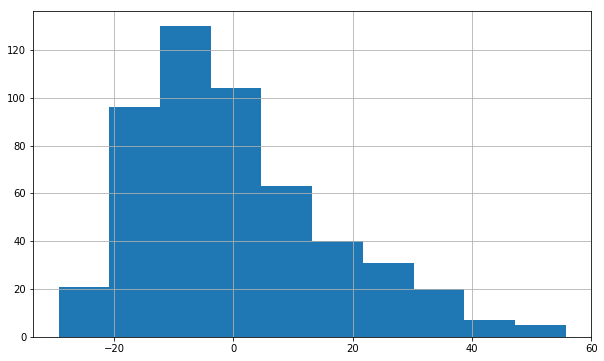

In [15]:
# Residuals histogram
model.resid.hist(figsize=(10,6));
# positive skew

#### Challenge 2
Repeat the process of challenge one, but also add one continuous (numeric) predictor variable. Also add plots of model prediction against your feature variable and residuals against feature variable. How can you interpret what's happening in the model?

In [16]:
X = sm.tools.add_constant(data.temp)

model2 = sm.OLS(target, X).fit()
model2.summary()

# ok, so we actually have a working model now!

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RH   R-squared:                       0.278
Model:                            OLS   Adj. R-squared:                  0.277
Method:                 Least Squares   F-statistic:                     198.4
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           2.36e-38
Time:                        16:03:58   Log-Likelihood:                -2092.4
No. Observations:                 517   AIC:                             4189.
Df Residuals:                     515   BIC:                             4197.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.2828      2.079     34.770      0.000      68.199      76.367
temp          -1.4820      0.105    -14.087      0.000      -1.689      -1.275
==============================================================================
Omnibus:                       10.202   Durbin-Watson:                   1.342
Prob(Omnibus):                  0.006   Jarque-Bera (JB):               13.966
Skew:                           0.178   Prob(JB):                     0.000928
Kurtosis:                       3.722   Cond. No.                         67.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

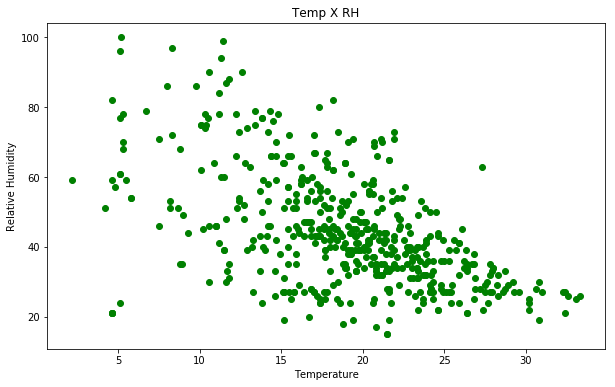

In [17]:
plt.figure(figsize=(10,6))
plt.plot(data.temp,target, 'go')
plt.title('Temp X RH')
plt.xlabel('Temperature')
plt.ylabel('Relative Humidity')
plt.show()

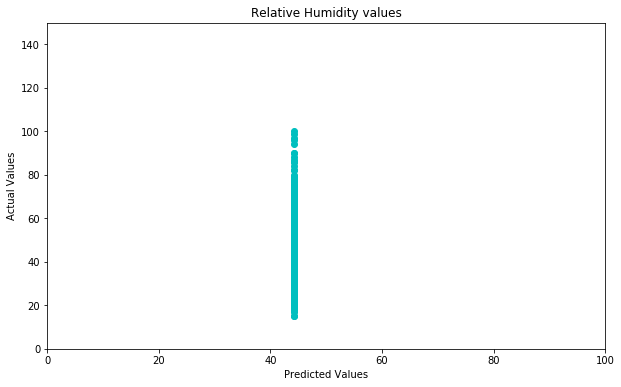

In [18]:
plt.figure(figsize=(10,6))
plt.plot(model.predict(),target, 'co')
plt.xlim(0,100)
plt.ylim(0,150)
plt.title('Relative Humidity values')
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.show()

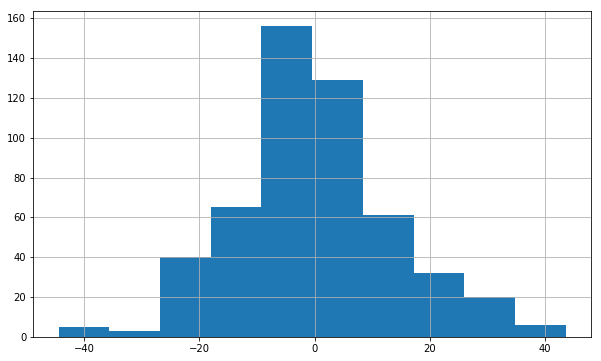

In [19]:
# Residuals histogram
model2.resid.hist(figsize=(10,6));
# positive skew, albeit closer to normal this time!

#### Challenge 3  
Repeat the process of challenge 1, but add a categorical feature (like genre). You'll have to convert a column of text into a number of numerical columns ("dummy variables"). How can you interpret what's happening in the model?

In [20]:
data['month'].value_counts()

aug    184
sep    172
mar     54
jul     32
feb     20
jun     17
oct     15
dec      9
apr      9
may      2
jan      2
nov      1
Name: month, dtype: int64

In [21]:
aug = pd.get_dummies(data["month"]).aug

In [22]:
X = sm.tools.add_constant(aug)

model3 = sm.OLS(target, X).fit()
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RH   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.549
Date:                Tue, 30 Jan 2018   Prob (F-statistic):              0.214
Time:                        16:04:01   Log-Likelihood:                -2175.9
No. Observations:                 517   AIC:                             4356.
Df Residuals:                     515   BIC:                             4364.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         43.6246      0.894     48.813      0.000      41.869      45.380
aug            1.8645      1.498      1.245      0.214      -1.079       4.808
==============================================================================
Omnibus:                       55.217   Durbin-Watson:                   1.668
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               70.102
Skew:                           0.872   Prob(JB):                     5.99e-16
Kurtosis:                       3.459   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

*We can interpret this as follows: if a datapoint is in august, relative humidity goes up by 1.865%*

#### Challenge 4 
Enhance your model further by adding more features and/or transforming existing features. Think about how you build the model matrix and how to interpret what the model is doing.

In [23]:
X = sm.tools.add_constant(aug).join(data.temp).join(data.wind)

model4 = sm.OLS(target, X).fit()
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                     RH   R-squared:                       0.351
Model:                            OLS   Adj. R-squared:                  0.347
Method:                 Least Squares   F-statistic:                     92.38
Date:                Tue, 30 Jan 2018   Prob (F-statistic):           8.20e-48
Time:                        16:04:04   Log-Likelihood:                -2065.0
No. Observations:                 517   AIC:                             4138.
Df Residuals:                     513   BIC:                             4155.
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         78.3072      2.697     29.034      0.000      73.009      83.606
aug            9.6867      1.303      7.434      0.000       7.127      12.247
temp          -1.8176      0.110    -16.466      0.000      -2.034      -1.601
wind          -0.7798      0.335     -2.327      0.020      -1.438      -0.122
==============================================================================
Omnibus:                       14.641   Durbin-Watson:                   1.341
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               20.356
Skew:                           0.256   Prob(JB):                     3.80e-05
Kurtosis:                       3.826   Cond. No.                         94.5
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

This is really fascinating - august's relationship with relative humidity becomes significant now that temperature and wind are also in the model? How does that make sense?

Let's look at residuals, for posterity.

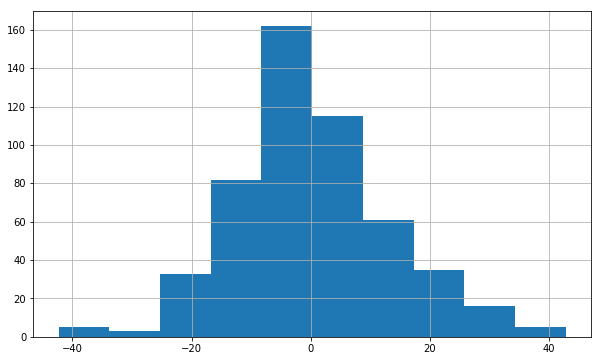

In [24]:
# Residuals histogram
model4.resid.hist(figsize=(10,6));
# still positive skew, but much closer to normal. Wow!

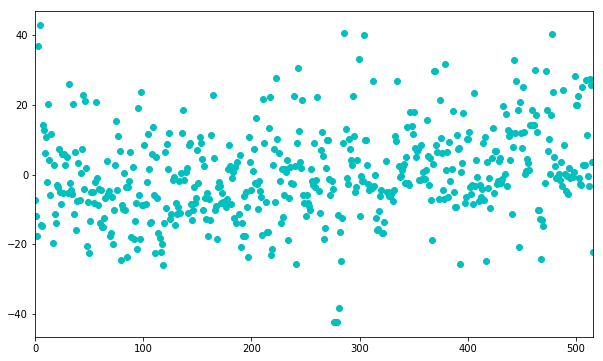

In [25]:
# Residuals scatter
model4.resid.plot(style='co', figsize=(10,6));

Pretty decent! I wish I had data this clean in college!

#### Challenge 5
Fitting and checking predictions on the exact same data set can be misleading. Divide your data into two sets: a training and a test set (roughly 75% training, 25% test is a fine split). Fit a model on the training set, check the predictions (by plotting versus actual values) in the test set.

##### sklearn setup

In [26]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

##### test-train split

R-squared is now: 0.268543816034


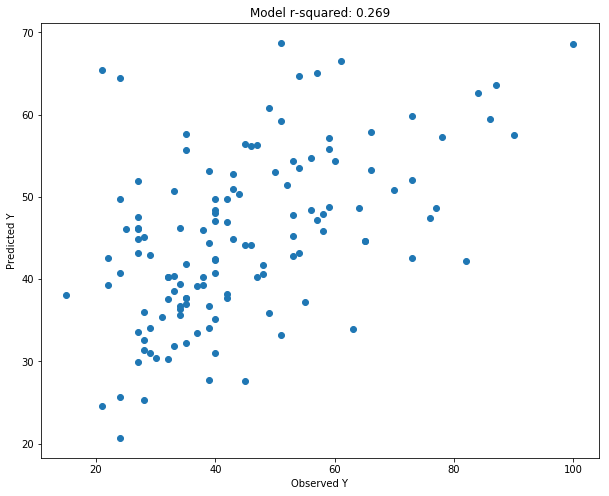

In [27]:
X_train, X_test, y_train, y_test = train_test_split(X, target, test_size=0.25)

model5 = LinearRegression()
model5.fit(X_train, y_train)
print('R-squared is now:',model5.score(X_test, y_test)) 

# Let's plot:
# lr3 = LinearRegression()
# lr3.fit(X2_train, y2_train)
predictions = model5.predict(X_test)

plt.figure(figsize=(10,8))
plt.scatter(y_test, predictions)

plt.xlabel("Observed Y")
plt.ylabel("Predicted Y")

plt.title(f"Model r-squared: {round(model5.score(X_test, y_test),3)}");

Gotta love sklearn!